In [11]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
url =('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Raw data/World demographic/population-growth-rate-vs-median-age.csv')

In [14]:
df = pd.read_csv(url, sep=';')

In [15]:
df.shape

(58335, 4)

In [20]:
df.head()

,Entity,Year,Natural growth rate - Sex: all - Age: all - Variant: estimates,Median age - Sex: all - Age: all - Variant: estimates
30,Afghanistan,1980.0,2.63,15.9
31,Afghanistan,1981.0,2.67,15.8
32,Afghanistan,1982.0,2.45,15.7
33,Afghanistan,1983.0,2.50,15.6
34,Afghanistan,1984.0,2.02,15.5


In [17]:
df.isnull().values.any()

True

In [18]:
df = df[df['Year'] >= 1980]


In [19]:
df

,Entity,Year,Natural growth rate - Sex: all - Age: all - Variant: estimates,Median age - Sex: all - Age: all - Variant: estimates
30,Afghanistan,1980.0,2.63,15.9
31,Afghanistan,1981.0,2.67,15.8
32,Afghanistan,1982.0,2.45,15.7
33,Afghanistan,1983.0,2.50,15.6
34,Afghanistan,1984.0,2.02,15.5
...,...,...,...,...
58143,Zimbabwe,2017.0,2.42,17.3
58144,Zimbabwe,2018.0,2.41,17.5
58145,Zimbabwe,2019.0,2.35,17.7
58146,Zimbabwe,2020.0,2.29,17.9


In [32]:
# Filter the DataFrame to keep only the rows from 1980 onwards
df = df[df['Year'] >= 1980]

# Function to check the percentage of NaN values in each column
def check_nan_percentage(column):
    nan_count = column.isna().sum()
    total_count = len(column)
    nan_percentage = nan_count / total_count
    return nan_percentage

# List to store countries with more than 35% NaN values
countries_with_high_nan = []

# Create a copy of the dataframe to modify
df_cleaned = df.copy()

# Process each country
for country in df['Entity'].unique():
    country_df = df[df['Entity'] == country]
    nan_percentages = country_df.apply(check_nan_percentage, axis=0)
    
    if nan_percentages.mean() > 0.35:
        countries_with_high_nan.append(country)
    else:
        # Fill NaN values column-wise for countries with <= 35% NaN values
        country_df = country_df.ffill(axis=0).bfill(axis=0).interpolate(method='linear', axis=0)
        df_cleaned.loc[df['Entity'] == country, :] = country_df

# Display the countries with more than 35% NaN values
if countries_with_high_nan:
    print("Countries with more than 35% NaN values:")
    for country in countries_with_high_nan:
        print(country)
else:
    print("No country has more than 35% NaN values.")

No country has more than 35% NaN values.


In [45]:
df = df.drop(columns=['Code'])

In [46]:
df.isnull().values.any()

False

In [1]:
df.info()

NameError: name 'df' is not defined

In [47]:
df.to_csv('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Raw data/World demographic/population-by-age-group_cleaned.csv',index=False,encoding='latin-1')

In [48]:
url = ('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Raw data/World demographic/population-by-age-group_cleaned.csv')

In [49]:
df = pd.read_csv(url)

In [50]:
df

,Entity,Year,Population by broad age group - Sex: all - Age: 65+ - Variant: estimates,Population by broad age group - Sex: all - Age: 25-64 - Variant: estimates,Population by broad age group - Sex: all - Age: 15-24 - Variant: estimates,Population by broad age group - Sex: all - Age: 5-14 - Variant: estimates,Population by broad age group - Sex: all - Age: 0-4 - Variant: estimates
0,Afghanistan,1950,213022,2773093,1425494,1820573,1248282
1,Afghanistan,1951,216096,2803308,1446694,1858587,1246857
2,Afghanistan,1952,219028,2834902,1468534,1896850,1248220
3,Afghanistan,1953,221925,2866392,1489850,1931657,1254725
4,Afghanistan,1954,224755,2898163,1510311,1963243,1267817
...,...,...,...,...,...,...,...
18283,Zimbabwe,2017,476920,5049812,3006441,3930524,2287404
18284,Zimbabwe,2018,495726,5171333,3093500,4008056,2283576
18285,Zimbabwe,2019,513733,5297464,3176011,4085658,2281740
18286,Zimbabwe,2020,529048,5431480,3260114,4161916,2287105


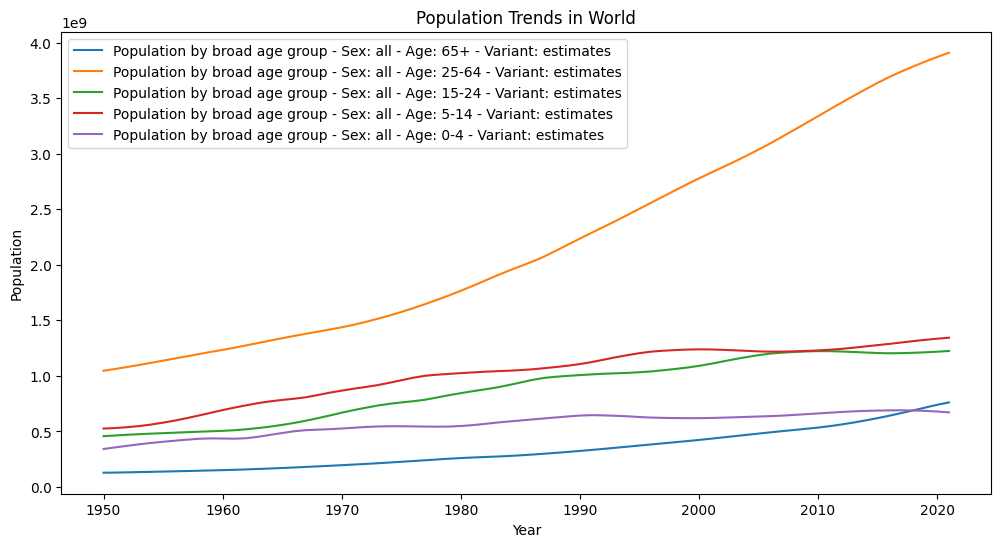

In [56]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country = 'World'
country_data = df[df['Entity'] == country]

# Plot population trends for different age groups
plt.figure(figsize=(12, 6))
for age_group in country_data.columns[3:]:
    plt.plot(country_data['Year'], country_data[age_group], label=age_group)

plt.title(f'Population Trends in {country}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()
